# Case Stone

## Análise de Negócios
- Na Stone atendemos o cliente por 4 canais: Telefone, Chat, Whatsapp e Email. O Telefone, era o nosso principal canal de atendimento, mas no último ano notamos um crescimento dos canais de Chat e Whatsapp. Isso trouxe alguns desafios para mensuramos a qualidade do nosso atendimento.
- Um dos pilares mais importantes no atendimento Stone é a rapidez e usamos para metrificar isso o kpi de Nível de Serviço. O Nível de Serviço é calculado vendo a quantidade de chamados que são atendidos dentro de 10s dividido pelo total de chamados recebidos. No entanto, conforme os canais escritos foram crescendo, vimos que o Nível de Serviço sozinho não era mais capaz de medir a qualidade do nosso atendimento. Isso acontece porque o cliente não quer agilidade apenas na primeira resposta, ele quer ser atendido com rapidez durante toda a troca de mensagens.

### Indicador TMI
- Esse indicador é calculador da seguinte forma: quantidade de chamados em que o tempo médio de interação está abaixo de 90s dividido pelo total de chamados atendidos. A meta atual de TMI é de 70% e 80% para Whatsapp e Chat, respectivamente.

### Objetivos:
1- Construa uma visualização que mostre a evolução do TMI por canal.

2- Identifique os principais ofensores do resultado e monte 3 planos de ação para melhorar o resultado de TMI no próximo mês.

3- Defina a meta de TMI de cada time e canal para os próximos 3 meses. Dica: considere o impacto dos seus planos de ação nessa meta.

4- Faça uma análise em relação ao nosso acordo de tempo (90s) e proponha um novo valor.

5- Dado o contexto explicado acima de crescimento dos canais escritos e importância da rapidez na qualidade do nosso atendimento, você pensa em algum outro indicador, diferente do TMI, para metrificar o nosso resultado?

### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Importando dados para dataframe pandas

In [2]:
df = pd.read_pickle("./Chamados.pkl")

### Explorando Dados

In [3]:
df.shape

(2980478, 6)

In [4]:
df.head(100)

,Data,Time,Ferramenta,Canal,Encantador,Tempo Medio Interacao (s)
303105,2021-04-30,Alfa,A,WhatsApp,samantha4353@stone.com.br,69.5
303260,2021-04-30,Sigma,A,WhatsApp,autumn6774@stone.com.br,406.0
303259,2021-04-30,Sigma,A,WhatsApp,autumn6774@stone.com.br,NaN
303258,2021-04-30,Sigma,A,WhatsApp,chase8699@stone.com.br,NaN
303257,2021-04-30,Sigma,A,WhatsApp,chase8699@stone.com.br,55.1
...,...,...,...,...,...,...
954,2021-05-01,Alfa,B,WhatsApp,blake4512@stone.com.br,126.0
953,2021-05-01,Alfa,B,WhatsApp,krystle7680@stone.com.br,3.0
911,2021-05-01,Alfa,B,WhatsApp,joseph0658@stone.com.br,46.0
937,2021-05-01,Alfa,B,WhatsApp,hector7743@stone.com.br,16.0


In [5]:
df.isna().sum()

Data                             0
Time                             0
Ferramenta                       0
Canal                            0
Encantador                       0
Tempo Medio Interacao (s)    52430
dtype: int64

In [6]:
df.dtypes

Data                         datetime64[ns]
Time                                 object
Ferramenta                           object
Canal                                object
Encantador                           object
Tempo Medio Interacao (s)           float64
dtype: object

In [7]:
df["Time"].value_counts()

Alfa     1583554
Beta      618799
Sigma     612306
Delta     165819
Name: Time, dtype: int64

In [8]:
df["Canal"].value_counts()

WhatsApp    2413610
Chat         566868
Name: Canal, dtype: int64

In [9]:
df["Tempo Medio Interacao (s)"].describe()

count    2.928048e+06
mean     2.052685e+02
std      2.088380e+03
min      0.000000e+00
25%      2.400000e+01
50%      4.700000e+01
75%      9.850000e+01
max      1.396094e+06
Name: Tempo Medio Interacao (s), dtype: float64

### Removendo NaN
- Poderiamos também alocar a média dos valores de TMI nos valores NaN, porém, como temos uma grande quantidade de dados, optei por apenas remover as linhas onde há valores NaN de TMI. Com o objetivo de não poluir nosso dado com uma informação estimada.

In [10]:
df.dropna(inplace=True)

In [11]:
df.head()

,Data,Time,Ferramenta,Canal,Encantador,Tempo Medio Interacao (s)
303105,2021-04-30,Alfa,A,WhatsApp,samantha4353@stone.com.br,69.5
303260,2021-04-30,Sigma,A,WhatsApp,autumn6774@stone.com.br,406.0
303257,2021-04-30,Sigma,A,WhatsApp,chase8699@stone.com.br,55.1
303256,2021-04-30,Sigma,A,WhatsApp,chase8699@stone.com.br,34.4
302974,2021-04-30,Alfa,A,Chat,scott6478@stone.com.br,25.3


In [12]:
df.rename(columns={"Tempo Medio Interacao (s)": "TMIs"}, inplace=True)

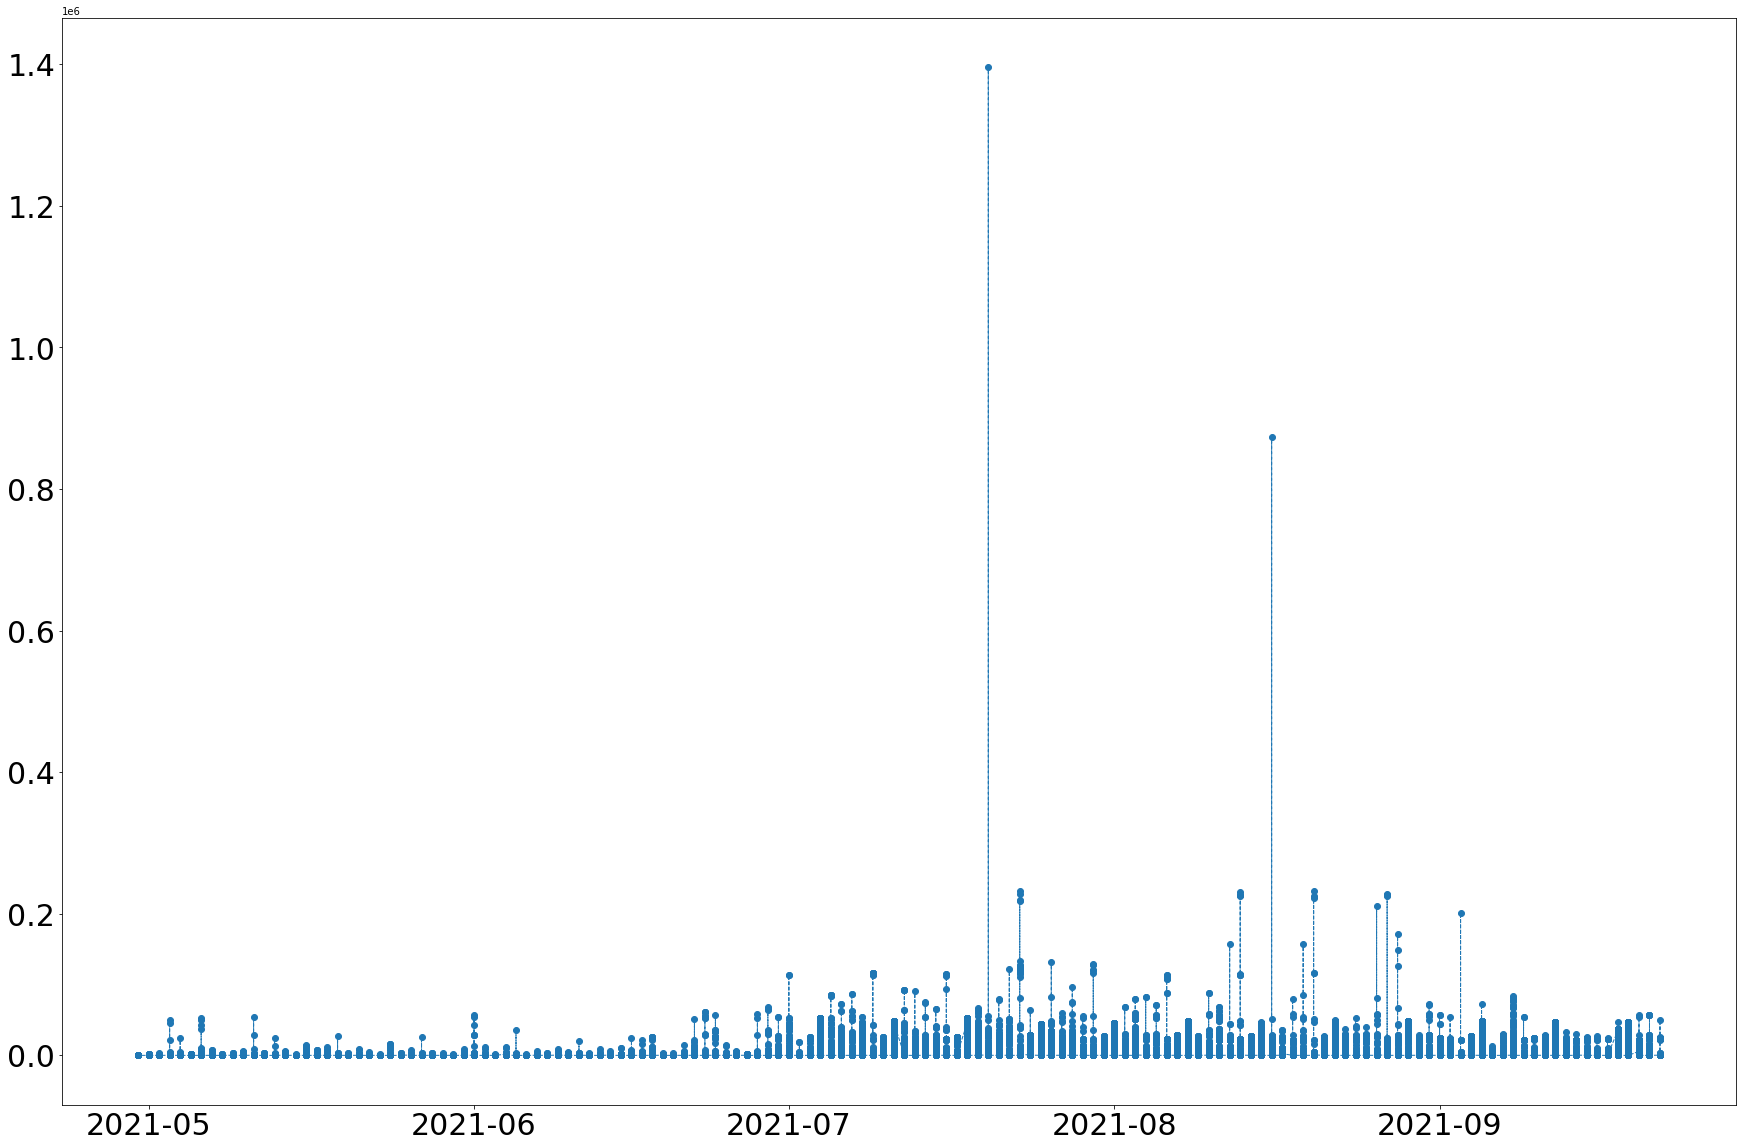

In [13]:
fig, ax = plt.subplots(figsize=(30,20))
ax = plt.plot_date(df.Data, df.TMIs, linewidth=1, linestyle='--')
plt.tick_params(labelsize=30)
plt.show()

In [14]:
df_filtered = df.drop(df[df.TMIs > 90].index)

In [15]:
df_filtered.head(5)

,Data,Time,Ferramenta,Canal,Encantador,TMIs
303257,2021-04-30,Sigma,A,WhatsApp,chase8699@stone.com.br,55.1
303134,2021-04-30,Alfa,A,WhatsApp,chase8699@stone.com.br,30.4
303135,2021-04-30,Alfa,A,WhatsApp,chase8699@stone.com.br,22.9
302985,2021-04-30,Alfa,A,Chat,chase8699@stone.com.br,36.2
303117,2021-04-30,Alfa,A,WhatsApp,shanna4214@stone.com.br,83.8


In [16]:
df_filtered.dtypes

Data          datetime64[ns]
Time                  object
Ferramenta            object
Canal                 object
Encantador            object
TMIs                 float64
dtype: object

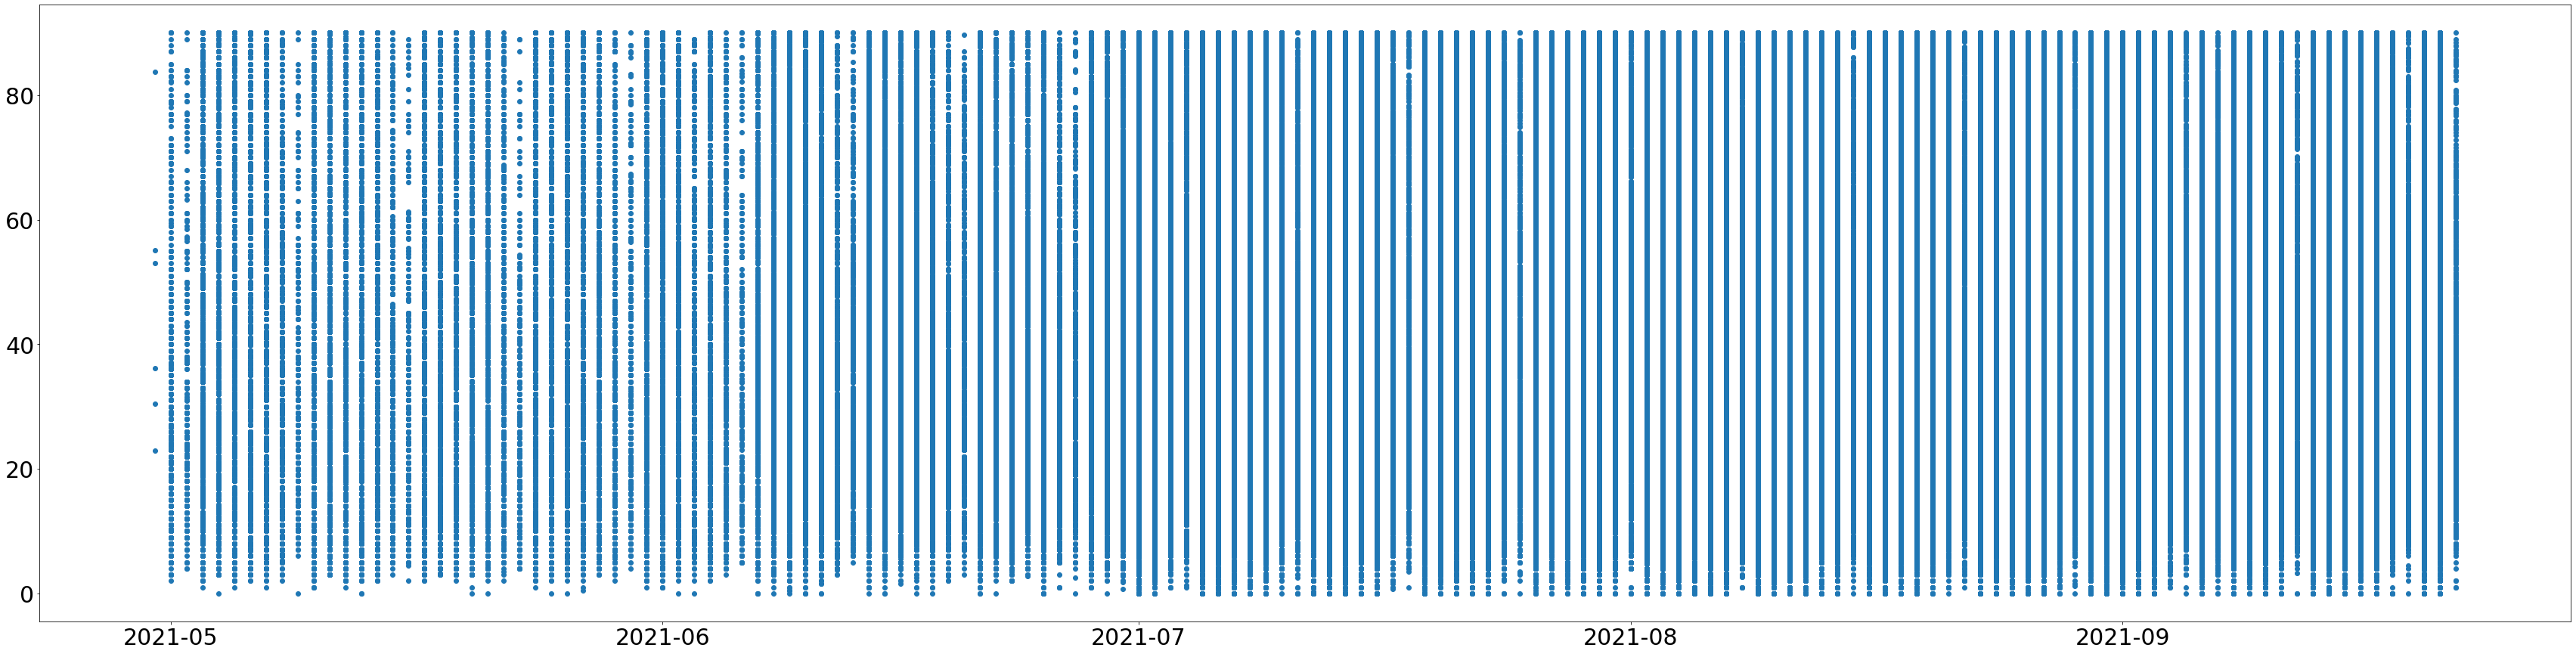

In [23]:
plt.plot_date(df_filtered.Data, df_filtered.TMIs);
plt.tick_params(labelsize=30)
plt.gcf().set_size_inches(60, 15)